In [19]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [20]:
# Import dataset
df = pd.read_csv('/Users/iragl/Documents/WGU/C964Capstone2/kc_house_data.csv')

# Dropping columns, null values and fill N/A values
df = df.drop(columns=['id', 'date', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition', 'floors'])
df = df.dropna(subset=['price'])
df = df.fillna(method='ffill')

#---------------------------

# Definging a function to remove outliers in the price column
def remove_outliers(df, price):
    # Calculate Q1 & Q3
    Q1= df['price'].quantile(0.25)
    Q3= df['price'].quantile(0.75)
    IQR= Q3 - Q1
    
    # Defining the boundaries for outliers
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    df_cleaned= df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

    # This returns a cleaned copy of the dataset with no outliers in the price column
    return df_cleaned

# Apply the function to remove outliers in the 'price' column
df_cleaned = remove_outliers(df, 'price')

In [21]:
# Print first 5 rowns of cleaned dataframe
print(df_cleaned.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  zipcode
0  221900.0         3       1.00         1180      5650    98178
1  538000.0         3       2.25         2570      7242    98125
2  180000.0         2       1.00          770     10000    98028
3  604000.0         4       3.00         1960      5000    98136
4  510000.0         3       2.00         1680      8080    98074


Text(0.5, 1.0, 'Correlation Matrix of Different Features')

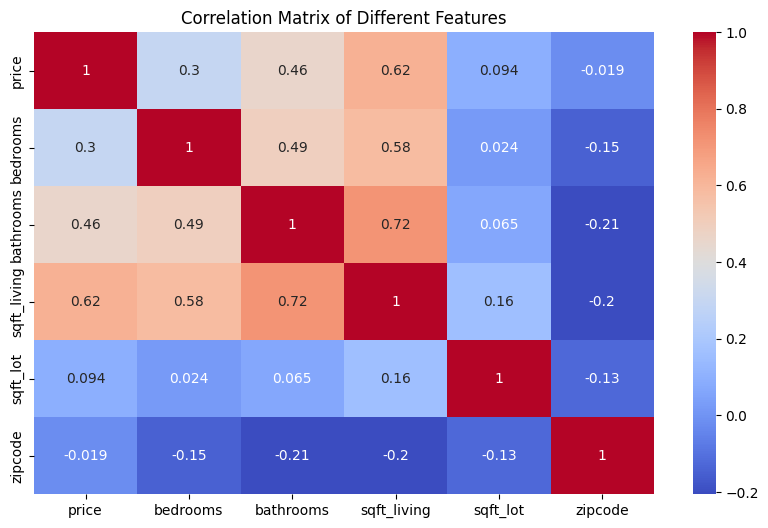

In [22]:
# Visualzation 1 Display heatmap of correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Different Features")

Text(0.5, 1.0, 'Distribution of Prices')

<Figure size 1000x600 with 0 Axes>

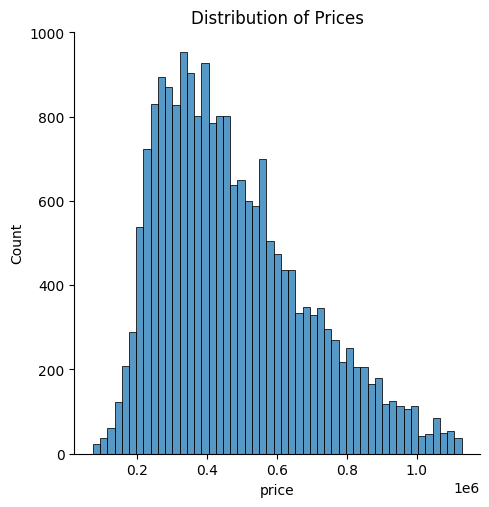

In [23]:
# Vizualization 2 Diplay distribution of prices
plt.figure(figsize=(10,6))
sns.displot(df_cleaned['price'])
plt.title("Distribution of Prices")

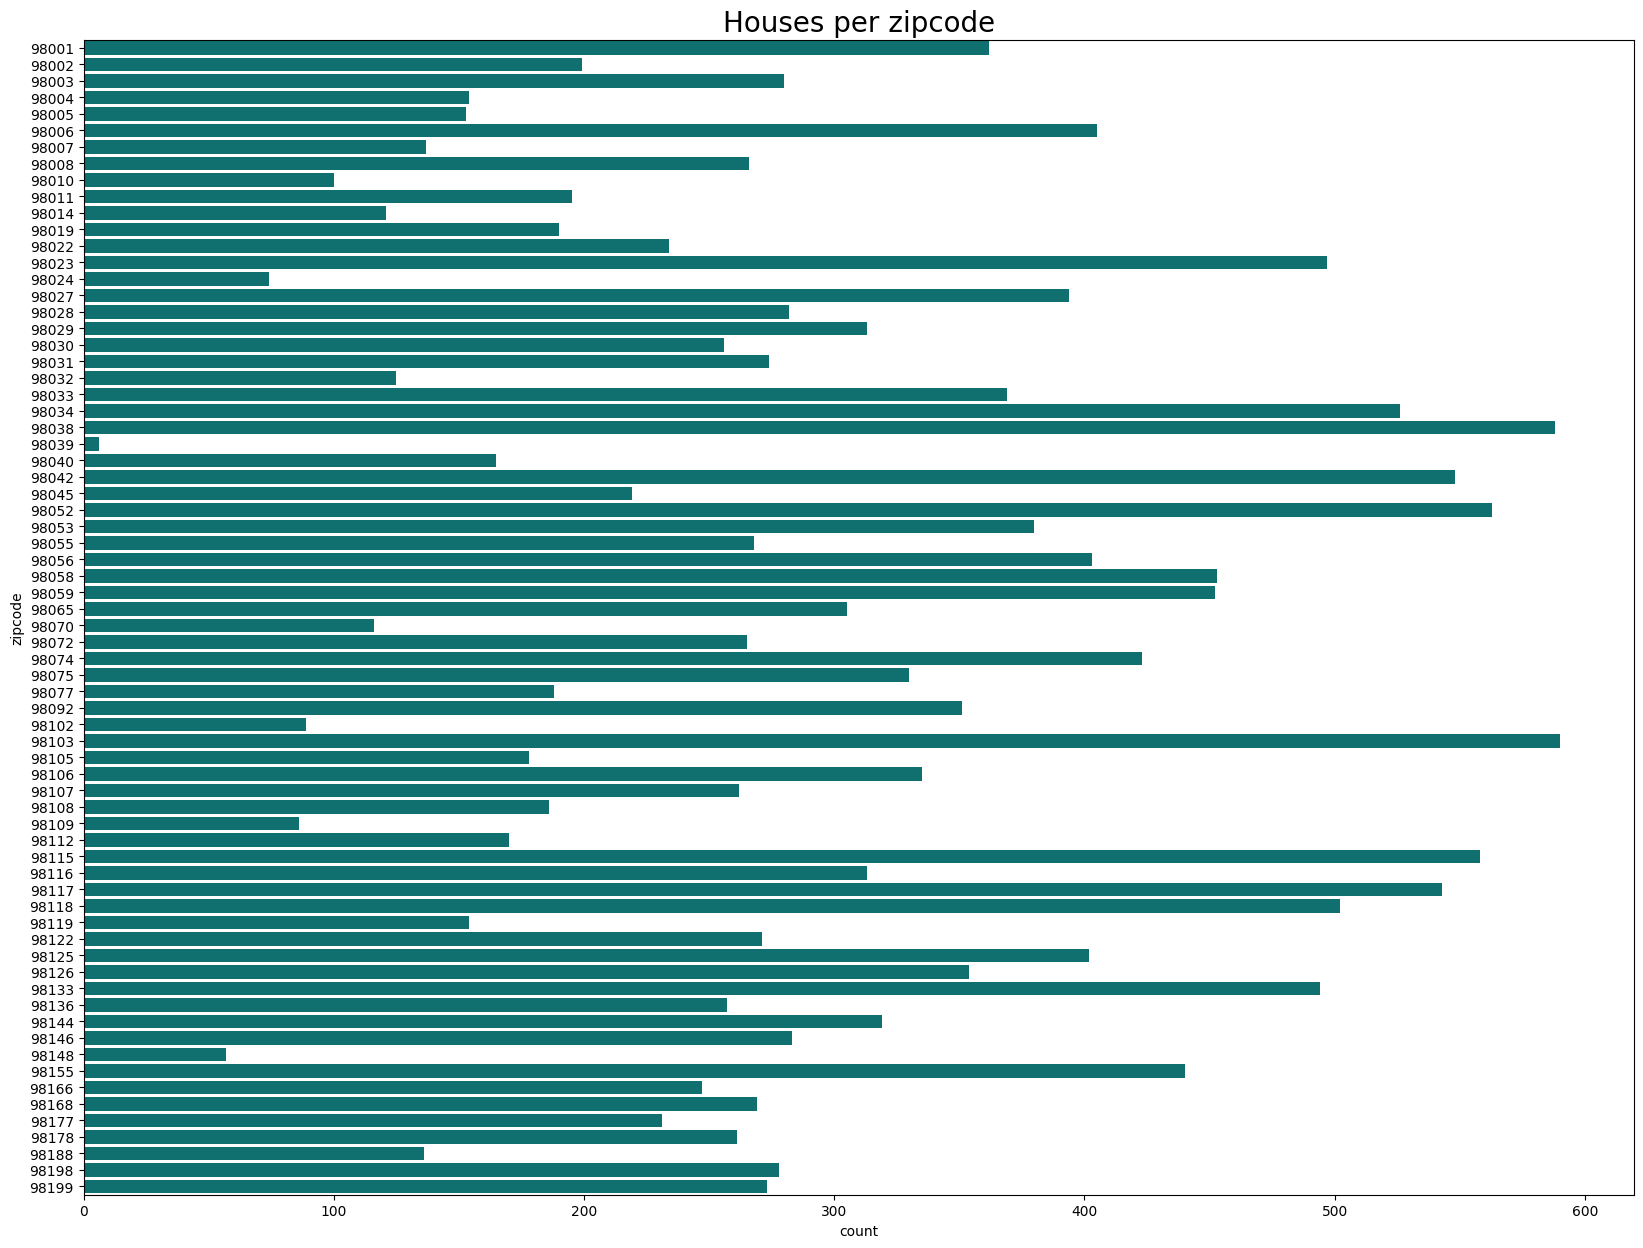

In [24]:
# Visulaization 3 Number of house per zipcode
plt.figure(figsize=(20,15))
sns.countplot(y= df_cleaned.zipcode, color='teal')
plt.title('Houses per zipcode', fontsize=20)
plt.show()

In [25]:
# ML Random Forest Regression model
# Loading features and target "price"
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price'] #target value

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create & train model for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# MAE, MSE, & R2 validation for accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error: 70964.57
Mean Squared Error: 10335416250.201336
R² Score: 0.7518152951521855


In [26]:
# User Interface that automatically updates given user input parameters
# Function to make house price prediction
def predict_price(bedrooms, bathrooms, sqft_living, sqft_lot, zipcode):
    # Create df for user input values
    input= pd.DataFrame([[bedrooms, bathrooms, sqft_living, sqft_lot, zipcode]], columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode'])
    # Make prediction
    predicted= model.predict(input)[0]
    return f"Congratulations! This is your predicted house price!: ${predicted:,.2f}"

# Create widgets
bedrooms= widgets.IntSlider(value=3, min=1, max=10, step=1, description='Bedrooms:')
bathrooms= widgets.FloatSlider(value=2.0, min=1.0, max=5.0, step=0.5, description='Bathrooms:')
sqft_living= widgets.IntSlider(value=1500, min=500, max=10000, step=100, description='Sqft Living:')
sqft_lot= widgets.IntSlider(value=5000, min=1000, max=50000, step=500, description='Sqft Lot:')
zipcode= widgets.Dropdown(options=df_cleaned['zipcode'].unique(), value=98001, description='Zipcode:')

# Output widgets to display
output = widgets.Output()

# Interactive update function to make predictions when inputs change
def update(value_change):
    with output:
        output.clear_output()
        prediction = predict_price(bedrooms.value, bathrooms.value, sqft_living.value, sqft_lot.value, zipcode.value)
        
        print(prediction)
        
# Attach update function to widgets given user input parameters
bedrooms.observe(update, names='value')
bathrooms.observe(update, names='value')
sqft_living.observe(update, names='value')
sqft_lot.observe(update, names='value')
zipcode.observe(update, names='value')

# Display UI and prediction output
display(bedrooms, bathrooms, sqft_living, sqft_lot, zipcode, output)
update(None)

IntSlider(value=3, description='Bedrooms:', max=10, min=1)

FloatSlider(value=2.0, description='Bathrooms:', max=5.0, min=1.0, step=0.5)

IntSlider(value=1500, description='Sqft Living:', max=10000, min=500, step=100)

IntSlider(value=5000, description='Sqft Lot:', max=50000, min=1000, step=500)

Dropdown(description='Zipcode:', index=25, options=(np.int64(98178), np.int64(98125), np.int64(98028), np.int6…

Output()